### Solving Poisson Equation on S^2: $\Delta u = f$


In [1]:
import my_backends 
from my_backends.ducc0_wrapper import *
import my_shcoeffs
from my_shcoeffs import SHCoeffs
## my_shcoeffs contains expand_adjoint_analysis

[Errno 2] No such file or directory: '/Users/aparnagupte/Documents/cornell-reu-2021/PDPINN/doc/plmbar.doc'
[Errno 2] No such file or directory: '/Users/aparnagupte/Documents/cornell-reu-2021/PDPINN/doc/plmbar_d1.doc'
[Errno 2] No such file or directory: '/Users/aparnagupte/Documents/cornell-reu-2021/PDPINN/doc/plbar.doc'
[Errno 2] No such file or directory: '/Users/aparnagupte/Documents/cornell-reu-2021/PDPINN/doc/plbar_d1.doc'
[Errno 2] No such file or directory: '/Users/aparnagupte/Documents/cornell-reu-2021/PDPINN/doc/plmon.doc'
[Errno 2] No such file or directory: '/Users/aparnagupte/Documents/cornell-reu-2021/PDPINN/doc/plmon_d1.doc'
[Errno 2] No such file or directory: '/Users/aparnagupte/Documents/cornell-reu-2021/PDPINN/doc/plon.doc'
[Errno 2] No such file or directory: '/Users/aparnagupte/Documents/cornell-reu-2021/PDPINN/doc/plon_d1.doc'
[Errno 2] No such file or directory: '/Users/aparnagupte/Documents/cornell-reu-2021/PDPINN/doc/plmschmidt.doc'
[Errno 2] No such file or dir

In [2]:
import torch

N = 20
from Basis import SPHBasis
from Problem import Problem_Sphere_Poisson
from Model import Model
from Net import Sphere_Net, SPH_Sphere_Net
import seaborn as sns
import matplotlib.pyplot as plt
import math
from math import pi
from spherical_harmonics import *
from torch.distributions.uniform import Uniform
from numpy import arccos
import numpy as np

import pyshtools
from pyshtools.shio import shread
from pyshtools.expand import MakeGridDH
from pyshtools.expand import SHExpandDH
from pyshtools.spectralanalysis import spectrum

torch.manual_seed(0)
maxiter = 1000
problem = Problem_Sphere_Poisson()

In [3]:
N = 20
azimuth = torch.linspace(0.0001, pi, N, requires_grad=False)
polar = torch.linspace(0, 2*pi, 2*N, requires_grad=False)

azimuth, polar = torch.meshgrid(azimuth, polar)
location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
location.shape

torch.Size([800, 2])

iteration 0: loss = 101.02820013512623, pde loss = 100.60489089836132


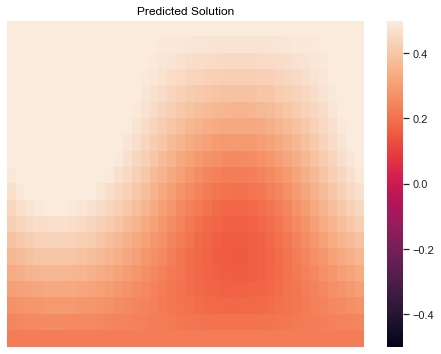

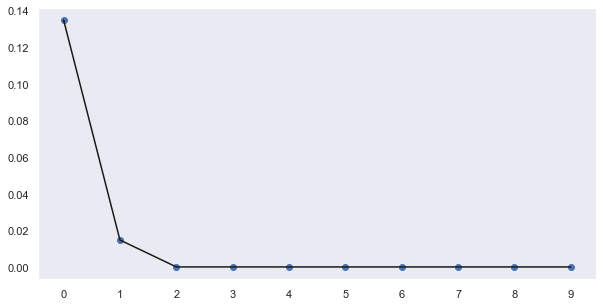

iteration 10: loss = 100.88153355499837, pde loss = 100.85066383635733
iteration 20: loss = 100.99563165616756, pde loss = 100.9953733516105
iteration 30: loss = 100.99338631284432, pde loss = 100.99317835315547
iteration 40: loss = 100.97628012096602, pde loss = 100.97584872751823
iteration 50: loss = 100.97210459567421, pde loss = 100.97181670448325
iteration 60: loss = 100.97333303946667, pde loss = 100.97321980650318
iteration 70: loss = 100.97505137612157, pde loss = 100.9750127435224
iteration 80: loss = 100.97646706338413, pde loss = 100.97645299979298
iteration 90: loss = 100.97731202475936, pde loss = 100.97730670087023
iteration 100: loss = 100.97815498696576, pde loss = 100.9781533742269
iteration 110: loss = 100.97897824471401, pde loss = 100.97897804492716
iteration 120: loss = 100.97926609614726, pde loss = 100.97926608678895
iteration 130: loss = 100.97931337748854, pde loss = 100.97931330586547
iteration 140: loss = 100.97962077468368, pde loss = 100.97962075472844
iter

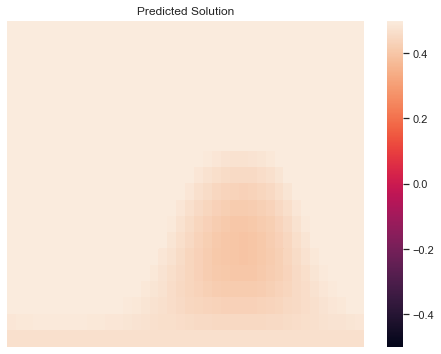

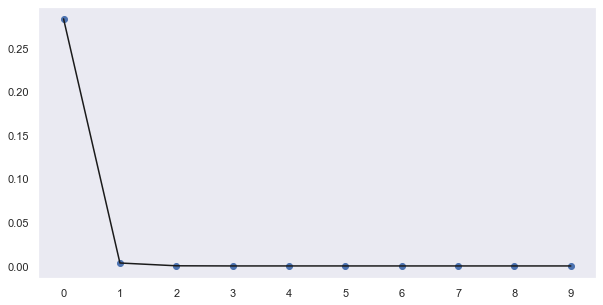

iteration 210: loss = 100.97924224266305, pde loss = 100.97924224264564
iteration 220: loss = 100.97920651843019, pde loss = 100.97920651843002
iteration 230: loss = 100.97907526459434, pde loss = 100.97907526459332
iteration 240: loss = 100.97920558757299, pde loss = 100.9792055875723
iteration 250: loss = 100.97909019098519, pde loss = 100.97909019098496
iteration 260: loss = 100.979255718298, pde loss = 100.97925571829799
iteration 270: loss = 100.97927195314767, pde loss = 100.97927195314766
iteration 280: loss = 100.97943220746536, pde loss = 100.97943220746536
iteration 290: loss = 100.97944604560472, pde loss = 100.97944604560472
iteration 300: loss = 100.97943519658747, pde loss = 100.97943519658747


In [ ]:

def construct_model(net):
    class Poisson1dModel(Model):
        def add_loss_history(self):
            self.loss_history.append([self.bc_loss, self.pde_loss, self.predict_error_value])

        def __init__(self):
            super().__init__(problem=problem, net=net, maxiter=maxiter)

        def inner_sample(self, N=N):
            azimuth = torch.linspace(0.0001, pi, N, requires_grad=False)
            polar = torch.linspace(0, 2*pi, 2*N, requires_grad=False)
            
            azimuth, polar = torch.meshgrid(azimuth, polar)
            location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
            return location

        def bc_sample(self):
            return torch.tensor([[1., 1.]])

        def init_sample(self):
            pass

        def plot(self, net):
            azimuth = torch.linspace(0, math.pi, N, requires_grad=False)
            polar = torch.linspace(0, 2 * math.pi, 2*N, requires_grad=False)
            azimuth, polar = torch.meshgrid(azimuth, polar)
            location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
            value = net(location)
            
            value = value.reshape((N, 2*N))
            
            fig, ax = plt.subplots(1, 1, figsize=(8, 6))
            sns.set()
            sns.heatmap(value.detach().numpy(), ax=ax, vmin=-0.5, vmax=0.5, cbar=True)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title("Predicted Solution")
            plt.show()
            
            self.spherical_harmonic_transform(net)
        
        def spherical_harmonic_transform(self, net):
            azimuth = torch.linspace(0, math.pi, N, requires_grad=False)
            polar = torch.linspace(0, 2 * math.pi, 2*N, requires_grad=False)
            azimuth, polar = torch.meshgrid(azimuth, polar)
            location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
            function_grid = net(location)
            function_grid = function_grid.reshape((N, 2*N))
            
            coefficients = SHExpandDH(function_grid.detach().numpy(), sampling=2)
            nl = coefficients.shape[1]
            ls = np.arange(nl)[:10]

            power_per_l = spectrum(coefficients)[:10]
            fig, ax = plt.subplots(1, 1, figsize=(len(ls), 5))
            ax.plot(ls, power_per_l, 'bo')
            ax.plot(ls, power_per_l, 'k-')
            plt.xticks(range(len(ls)))
            ax.grid()
            plt.show()
            
        
        def plot_true(self):
            azimuth = torch.linspace(0, math.pi, N, requires_grad=False)
            polar = torch.linspace(0, 2 * math.pi, 2*N, requires_grad=False)
            azimuth, polar = torch.meshgrid(azimuth, polar)
            location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
            value = true_solution(location[:, 0:1], location[:, 1:])
            
            value = value.reshape((N, 2*N))
            
            fig, ax = plt.subplots(1, 1, figsize=(8, 6))
            sns.set()
            sns.heatmap(value.detach().numpy(), ax=ax, vmin=-0.5, vmax=0.5, cbar=True)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title("True Solution")
            plt.show()
            
        def post_process(self, ax=None):
            if ax is None:
                for losses in self.loss_history:
                    for i in range(3):
                        losses[i].detach().numpy()
                plt.plot(self.loss_history)
                plt.yscale('log')
                plt.legend(('BC loss', 'pde loss', 'predict error'))
                plt.show()
            else:
                for losses in self.loss_history:
                    for i in range(3):
                        losses[i].detach().numpy()
                ax.plot(self.loss_history)
                ax.set_yscale('log')
                ax.set_ylim(1e-4, 100)
                ax.legend(('BC loss', 'pde loss', 'predict error'))

        def predict_error(self):
            coor = self.inner_sample()
            true = self.problem.ground_truth(coor)
            predict = self.net(coor)
            predict_error = self.pde_loss_f(true, predict)
            return predict_error

        def train(self, ax100=None):
            problem = self.problem
            net = self.net
            opt = self.opt
            maxiter = self.maxiter

            for iter in range(maxiter):
                net.zero_grad()

                coor_inner = self.inner_sample().detach().requires_grad_(True)
                infer_value_inner = net(coor_inner)
                truth_inner, predict_inner = problem.pde(coor_inner, infer_value_inner)
                self.pde_loss = self.pde_loss_f(predict_inner, truth_inner)

                bc_samples = self.bc_sample()
                if bc_samples is None:
                    self.bc_loss = torch.tensor(0.)
                else:
                    coor_bc = bc_samples.detach().requires_grad_(True)
                    infer_value_bc = net(coor_bc)
                    truth_bc, predict_bc = problem.bound_condition(coor_bc, infer_value_bc)
                    self.bc_loss = self.bc_loss_f(predict_bc, truth_bc)

                init_samples = self.init_sample()
                if init_samples is None:
                    self.init_loss = torch.tensor(0.)
                else:
                    coor_init = init_samples.detach().requires_grad_(True)
                    infer_value_init = net(coor_init)
                    truth_init, predict_init = problem.bound_condition(coor_init, infer_value_init)
                    self.init_loss = self.bc_loss_f(predict_init, truth_init)
                self.predict_error_value = self.predict_error()
                self.total_loss = self.pde_loss + self.bc_loss + self.init_loss
                # print("pde: "+ str(self.pde_loss))
                # print("bc: "+ str(self.bc_loss))
                # print("init: "+ str(self.init_loss))
                self.add_loss_history()
                self.total_loss.backward()

                opt.step()
                opt.zero_grad()
                
                if iter % (maxiter // 100) == 0:
                    print("iteration {}: loss = {}, pde loss = {}".format(iter, self.total_loss, self.pde_loss))
                        
                if iter % int(maxiter / 5) == 0:
                    self.plot(net)
                
            self.plot(net)
            self.plot_true()
            # self.post_process()

    return Poisson1dModel()

model = construct_model(Sphere_Net([3, 100, 50, 50, 16, 1]))
model.train()
